В финальном спринте вы отработаете новые навыки в условиях, максимально приближенных к рабочим. За две недели вам нужно решить несколько задач, а поможет в этом специалист команды сопровождения — тимлид. На время он станет вашим коллегой: поставит задачи и проверит, как вы их выполнили.

Задачи
Вам предстоит построить прототип модели машинного обучения. Его разработка состоит из нескольких этапов:
* Составьте план работы. Исходное условие задачи заведомо неполное и содержит лишнюю информацию. Проведите разведывательный анализ данных, чтобы понять, какие вопросы подготовить.
* Уточните задачу. Задайте вопросы тимлиду, на вводном вебинаре.
* Разработайте модель. Отдайте код на проверку тимлиду.
* Подготовьте отчёт. Отправьте отчёт тимлиду, чтобы он проверил успешность выполнения задания.


От качества вашей модели зависит успешность прохождения задания. Критериями проверки поделится тимлид, когда уточнит задачу на вводном вебинаре.

В следующей теме вы увидите описания двух проектов. Первый посвящён металлургической промышленности, второй — сфере телекоммуникаций. Вам нужно выполнить только один проект. Если вы ещё не знаете, какой из них вам назначен, обратитесь к куратору.

Удачи!


<h1>Описание проекта: промышленность</h1>
<p>Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.</p>

<h2>Описание этапа обработки</h2>
1. Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша.
2. Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).
3. Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом.
4. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.
Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. slab, «плита»).
<h2>Описание данных</h2
>
Данные состоят из файлов, полученных из разных источников:

* data_arc_new.csv — данные об электродах;
* data_bulk_new.csv — данные о подаче сыпучих материалов (объём);
* data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);
* data_gas_new.csv — данные о продувке сплава газом;
* data_temp_new.csv — результаты измерения температуры;
* data_wire_new.csv — данные о проволочных материалах (объём);
* data_wire_time_new.csv  — данные о проволочных материалах (время).

Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.
Данные

* https://code.s3.yandex.net/datasets/data_arc_new.csv
* https://code.s3.yandex.net/datasets/data_bulk_new.csv
* https://code.s3.yandex.net/datasets/data_bulk_time_new.csv
* https://code.s3.yandex.net/datasets/data_gas_new.csv
* https://code.s3.yandex.net/datasets/data_temp_new.csv
* https://code.s3.yandex.net/datasets/data_wire_new.csv
* https://code.s3.yandex.net/datasets/data_wire_time_new.csv

Данные также находятся в тренажёре, в папке /datasets/.

In [4]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.1 MB/s eta 0:00:00


Загрузим библиотеки

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

Загрузим и изучим данные

In [7]:
try:
  data_arc_new = pd.read_csv('/datasets/data_arc.csv')
  data_bulk_new = pd.read_csv('/datasets/data_bulk.csv')
  data_bulk_time_new = pd.read_csv('/datasets/data_bulk_time.csv')
  data_gas_new = pd.read_csv('/datasets/data_gas.csv')
  data_temp_new = pd.read_csv('/datasets/data_temp.csv')
  data_wire_new = pd.read_csv('/datasets/data_wire.csv')
  data_wire_time_new = pd.read_csv('/datasets/data_wire_time.csv')
except:
  data_arc_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_arc_new.csv')
  data_bulk_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_bulk_new.csv')
  data_bulk_time_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_bulk_time_new.csv')
  data_gas_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_gas_new.csv')
  data_temp_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_temp_new.csv')
  data_wire_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_wire_new.csv')
  data_wire_time_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_wire_time_new.csv')

In [8]:
data_arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [ ]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [ ]:
data_arc_new.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [ ]:
print('Колличество пропусков в каждом столбце')
print(data_arc_new.isna().sum())
print(50*'=')
print('Колличество дублей')
print(data_arc_new.duplicated().sum())

Колличество пропусков в каждом столбце
key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64
Колличество дублей
0


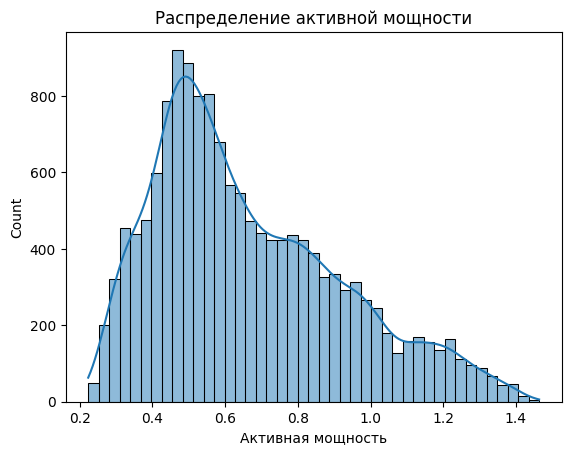

In [11]:
sns.histplot(data_arc_new['Активная мощность'], kde=True)
plt.title('Распределение активной мощности')
plt.show()

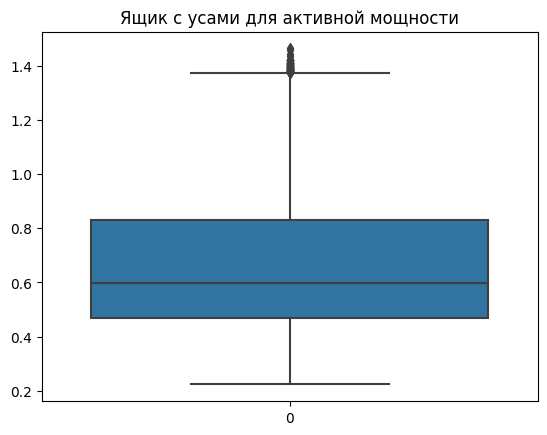

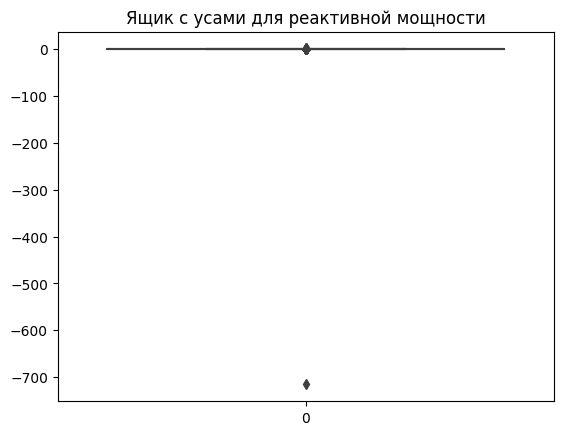

In [13]:
# Ящик с усами для активной мощности
sns.boxplot(data_arc_new['Активная мощность'])
plt.title('Ящик с усами для активной мощности')
plt.show()

# Ящик с усами для реактивной мощности
sns.boxplot(data_arc_new['Реактивная мощность'])
plt.title('Ящик с усами для реактивной мощности')
plt.show()

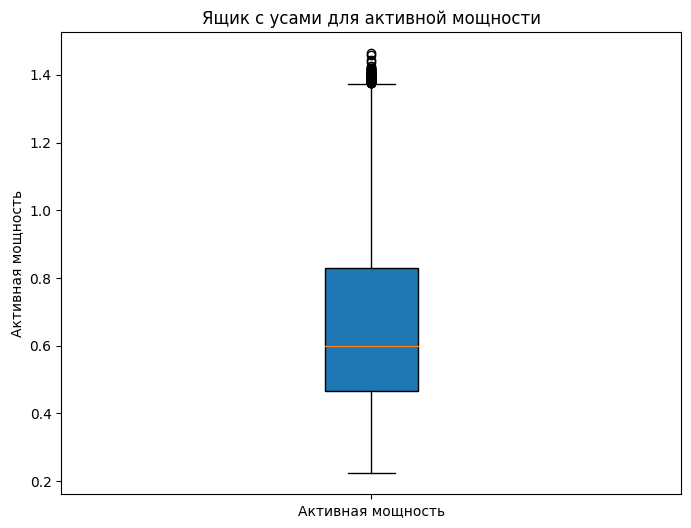

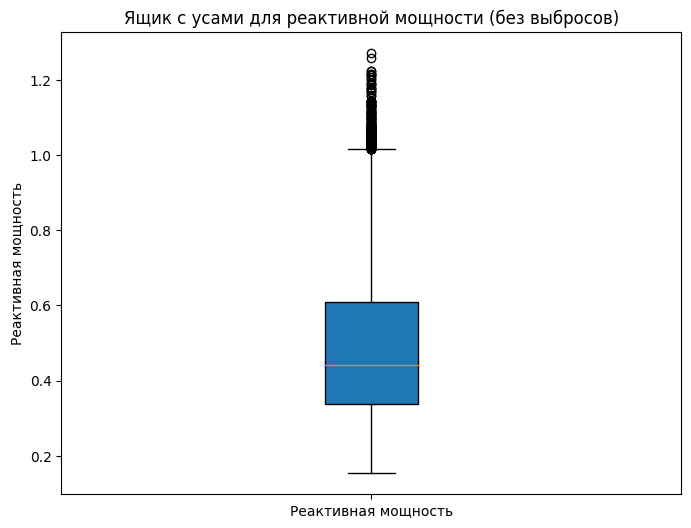

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(data_arc_new['Активная мощность'], vert=True, patch_artist=True)
plt.title('Ящик с усами для активной мощности')
plt.ylabel('Активная мощность')
plt.xticks([1], ['Активная мощность'])
plt.show()

# Рассчитываем квартили и межквартильный размах
Q1 = data_arc_new['Реактивная мощность'].quantile(0.25)
Q3 = data_arc_new['Реактивная мощность'].quantile(0.75)
IQR = Q3 - Q1

# Рассчитываем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные без выбросов
filtered_data = data_arc_new[(data_arc_new['Реактивная мощность'] >= lower_bound) ]

# Построение графика "ящик с усами" для отфильтрованных данных
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['Реактивная мощность'], vert=True, patch_artist=True)
plt.title('Ящик с усами для реактивной мощности (без выбросов)')
plt.ylabel('Реактивная мощность')
plt.xticks([1], ['Реактивная мощность'])
plt.show()

Пропусков и дублей нет, в реактивной мощности есть отрицательные значения, прверим остальные файлы

In [ ]:
print(data_bulk_new.info())
print(50*'=')
print(data_bulk_new.head())
print(50*'=')
print(data_bulk_new.describe())
print(50*'=')
print('Колличество пропусков в каждом столбце')
print(data_bulk_new.isna().sum())
print(50*'=')
print('Колличество дублей')
print(data_bulk_new.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None
   key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1  

Много пропусков и не ясно что за bulk.


In [ ]:
print(data_bulk_time_new.info())
print(50*'=')
print(data_bulk_time_new.head())
print(50*'=')
print(data_bulk_time_new.describe())
print(50*'=')
print('Колличество пропусков в каждом столбце')
print(data_bulk_time_new.isna().sum())
print(50*'=')
print('Колличество дублей')
print(data_bulk_time_new.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None
   key Bulk 1 Bulk 2 Bulk 3               Bulk 4 Bulk 5 Bulk 6 Bulk 7 Bulk 8  \
0    1    NaN    NaN    NaN  2019-05-03 11:28:48    NaN    NaN    NaN    NaN   
1    2   

Пропусков достаточно много

In [ ]:
print(data_gas_new.info())
print(50*'=')
print(data_gas_new.head())
print(50*'=')
print(data_gas_new.describe())
print(50*'=')
print('Колличество пропусков в каждом столбце')
print(data_gas_new.isna().sum())
print(50*'=')
print('Колличество дублей')
print(data_gas_new.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None
   key      Газ 1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692
               key        Газ 1
count  3239.000000  3239.000000
mean   1621.861377    11.002062
std     935.386334     6.220327
min       1.000000     0.008399
25%     812.500000     7.043089
50%    1622.000000     9.836267
75%    2431.500000    13.769915
max    3241.000000    77.995040
Колличество пропусков в каждом столбце
key      0
Газ 1    0
dtype: int64
Колличество дублей
0


**ПОДвывод
**

In [ ]:
print(data_temp_new.info())
print(50*'=')
print(data_temp_new.head())
print(50*'=')
print(data_temp_new.describe())
print(50*'=')
print('Колличество пропусков в каждом столбце')
print(data_temp_new.isna().sum())
print(50*'=')
print('Колличество дублей')
print(data_temp_new.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB
None
   key         Время замера  Температура
0    1  2019-05-03 11:02:04       1571.0
1    1  2019-05-03 11:07:18       1604.0
2    1  2019-05-03 11:11:34       1618.0
3    1  2019-05-03 11:18:04       1601.0
4    1  2019-05-03 11:25:59       1606.0
                key   Температура
count  18092.000000  14665.000000
mean    1616.460977   1590.722741
std      934.641385     20.394381
min        1.000000   1191.000000
25%      807.750000   1580.000000
50%     1618.000000   1590.000000
75%     2429.000000   1599.000000
max     3241.000000   1705.000000
Колличество пропусков в каждом столбце
key              

Подвывод

In [ ]:
print(data_wire_new.info())
print(50*'=')
print(data_wire_new.head())
print(50*'=')
print(data_wire_new.describe())
print(50*'=')
print('Колличество пропусков в каждом столбце')
print(data_wire_new.isna().sum())
print(50*'=')
print('Колличество дублей')
print(data_wire_new.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None
   key     Wire 1   Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
0    1  60.059998      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2  96.052315      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    3  91.160157      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    4  89.063515      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4 

In [ ]:
print(data_wire_time_new.info())
print(50*'=')
print(data_wire_time_new.head())
print(50*'=')
print(data_wire_time_new.describe())
print(50*'=')
print('Колличество пропусков в каждом столбце')
print(data_wire_time_new.isna().sum())
print(50*'=')
print('Колличество дублей')
print(data_wire_time_new.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None
   key               Wire 1               Wire 2 Wire 3 Wire 4 Wire 5 Wire 6  \
0    1  2019-05-03 11:06:19                  NaN    NaN    NaN    NaN    NaN   
1    2  2019-05-03 11:36:50                  NaN    NaN    NaN    NaN    NaN   
2    3  2019-05-03 12:11:46                  NaN    NaN    NaN    NaN    NaN   
3    4  2019-05-03 12:43:22                  NaN    NaN    NaN    NaN    NaN   
4   

Попробуем склеить в одну таблицу по столбцу key


In [ ]:
# frames = [data_temp_new, data_gas_new, data_bulk_time_new, data_wire_time_new]
# merged_data = pd.concat(frames, axis=1)
merged_data = data_temp_new.merge(data_gas_new, on='key', how='inner')
merged_data = merged_data.merge(data_bulk_time_new, on='key', how='inner')
merged_data = merged_data.merge(data_wire_time_new, on='key', how='inner')


In [ ]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17223 entries, 0 to 17222
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           17223 non-null  int64  
 1   Время замера  17223 non-null  object 
 2   Температура   13959 non-null  float64
 3   Газ 1         17223 non-null  float64
 4   Bulk 1        1569 non-null   object 
 5   Bulk 2        188 non-null    object 
 6   Bulk 3        7525 non-null   object 
 7   Bulk 4        5726 non-null   object 
 8   Bulk 5        538 non-null    object 
 9   Bulk 6        3463 non-null   object 
 10  Bulk 7        199 non-null    object 
 11  Bulk 8        5 non-null      object 
 12  Bulk 9        126 non-null    object 
 13  Bulk 10       1007 non-null   object 
 14  Bulk 11       1053 non-null   object 
 15  Bulk 12       13797 non-null  object 
 16  Bulk 13       141 non-null    object 
 17  Bulk 14       15678 non-null  object 
 18  Bulk 15       13072 non-nu